## Tensors

Tensor란 GPU 위에 올라가는 numpy array로 딥러닝 input/output 의 기본 단위


In [1]:
import torch
import numpy as np

### Initializing a tensor

In [ ]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

From a numpy array

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

From another tensor

In [ ]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f'Ones Tensor: \n {x_ones}\n')
print(f'Random Tensor: \n {x_rand} \n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])

Random Tensor: 
 tensor([[0.2286, 0.8014],
        [0.6989, 0.0251]]) 



With random or constant value

shape 를 직접적으로 명시해서 tensor 의 크기를 지정할 수 있음

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9788, 0.5725, 0.4605],
        [0.5245, 0.0579, 0.1232]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a tensor

torch 로 선언한 tensor 에는 shape, datatype, device 를 파악할 수 있는 속성을 담고 있음

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on tensors

Tensor 는 다양한 연산을 지원하며, cpu나 gpu에서 수행할 수 있음

디폴트로는 cpu 상에서 선언되며 .to 메소드를 사용하여 gpu로 옮길 수 있음

In [ ]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

리스트와 비슷한 인덱싱

In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


numpy concatenate 처럼 tensor 를 이어붙임

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Bridge with Numpy

CPU tensor 와 numpy array 는 메모리 공유가 가능

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets & Dataloaders

딥러닝 코드는 보통 데이터전처리/모델링/훈련 으로 구분되는데 pytorch 에서는 데이터전처리를 전담하는 Dataset/DataLoader 함수를 제공함

### Loading a dataset

Fashion-MNIST 데이터셋 로드

60000개의 훈련 데이터와 10000개의 테스트 데이터로 구성되어 있고 각 데이터는 28x28 크기의 grayscale 이미지, 라벨은 총 10

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Visualizing the Dataset

Dataset 객체는 매뉴얼하게 인덱싱 가능

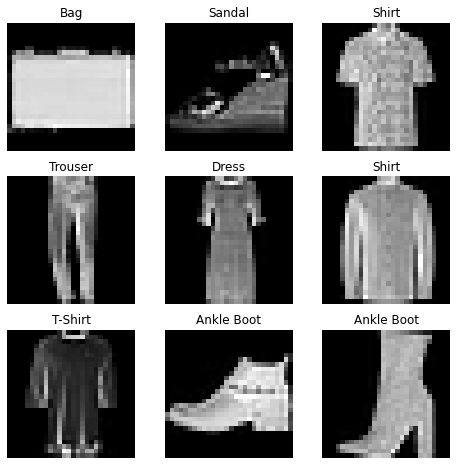

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a custom dataset

Data 파일로부터 custom dataset 을 구성하려면 Dataset 을 상속하는 클래스를 정의하고 1) __init__, 2) __len__, 3) __getitem__ 함수를 정의해주어야 함

__init__ 함수

Dataset 을 상속받은 클래스가 선언될 때의 생성자로 데이터를 담고 있는 디렉토리를 입력으로 받음

__len__ 함수

전체 데이터셋의 길이를 return

__getitem__

전체 데이터셋에서 입력으로 들어온 인덱스에 맞는 샘플과 라벨을 return. Return 하기 전에 데이터와 라벨에 대해 transformation 을 거치고 return

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### DataLoaders

Dataset 을 구성했으면 그것을 batch 단위로 읽어오는 dataloader 가 필요

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

DataLoader 는 파이썬에서 iterable 객체로 반복이 가능함

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


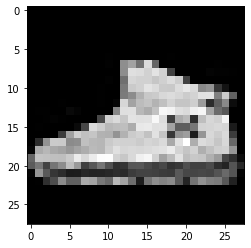

Label: 7


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

학습을 위해서 데이터를 불러올 떄 적절한 전처리를 수행해야함. 

torchvision 의 데이터셋은 transform, target_transform 파라미터가 존재

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

ToTensor()는 numpy array 이미지를 FloatTensor 로 바꾸어주면서 [0,1] 사이로 값을 scaling

Lambda 는 라벨을 one-hot encoding 수행

In [ ]:
ds[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

## Build the neural network

Neural networks 를 구성하기 위해서는 torch.nn.Module 를 상속해야함

nn 모듈에는 neural networks 구성하는 기본적인 block 들이 존재

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

GPU 가 사용가능하다면 GPU 로 device 할당

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Define the class

nn.Module 을 상속한 클래스르 정의하고 __init__ 함수에 필요한 neural networks 구성요소를 정의

forward 함수를 통해 입력에서 출력을 return

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

GPU를 사용한다면 반드시 model을 맞는 device 로 변환해주어야 함

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


model 의 forward 함수를 통해 입력에 대한 출력 return

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


### Model Layers

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten() 을 통해 2d를 1차원으로

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.Linear 는 linear transformation

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU 는 non-linear activation

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0309, -0.3533, -0.3789, -0.3309, -0.2037, -0.3485, -0.3564,  0.6495,
          0.0286, -0.3753,  0.1341,  0.4734, -0.1476, -0.3592, -0.1278, -0.0681,
          0.2033, -0.5682, -0.4074, -0.2816],
        [-0.2732, -0.1287, -0.4225, -0.4781, -0.0478, -0.5080, -0.0649,  0.2584,
         -0.0176,  0.3336, -0.0845,  0.3335, -0.2227, -0.3429, -0.0418, -0.1986,
         -0.1630, -0.6800, -0.4233, -0.4436],
        [-0.2660, -0.0376, -0.3906, -0.3803,  0.2493, -0.3052,  0.0096,  0.6301,
          0.1074,  0.2633, -0.0350,  0.6618, -0.3536, -0.0398, -0.2905, -0.1200,
         -0.2716, -0.5619, -0.1235, -0.2940]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0309, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6495, 0.0286,
         0.0000, 0.1341, 0.4734, 0.0000, 0.0000, 0.0000, 0.0000, 0.2033, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2584, 0.0000,
         0.3336, 0.0000, 0.3335, 0.0000, 0.0000, 0.000

nn.Sequential 은 각 neural networks 모듈을 연속으로 담는 모듈

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

nn.Softmax 는 분류를 위해서 [0,1] 사이의 확률 분포로 바꾸어줌 

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

nn.Module 을 상속함으로서 모델에 정의된 neural networks 파라미터를 파악할 수 있음

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0325,  0.0054,  0.0012,  ..., -0.0306, -0.0341,  0.0017],
        [-0.0004, -0.0025, -0.0149,  ..., -0.0335, -0.0144,  0.0138]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0018, -0.0327], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0401, -0.0399,  0.0308,  ...,  0.0265,  0.0030,  0.0125],
        [ 0.0151,  0.0038,  0.0294,  ...,  0.0176,  0.0123,  0.0222]],
       device='cuda

## Backpropagation

Neural networks 는 목적함수에 대한 기울기를 back-propagation 시키는 방법으로 파라미터 업데이트

목적함수를 정의하고 backward() 함수를 통해 requires_grad 가 정의된 파라미터에 대해 기울기를 얻을 수 있음

파라미터 w, b 에 대해서 목적함수에 대한 기울기를 구해야하므로 requires_grad=True 로 설정, 디폴트는 False

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(x)
print(w)

tensor([1., 1., 1., 1., 1.])
tensor([[ 2.2152, -0.4570, -0.5350],
        [-0.3523, -1.0538, -0.2933],
        [-0.9906,  1.1689, -0.1245],
        [-1.1339,  0.9332,  1.4682],
        [-0.5877, -1.3200, -2.8175]], requires_grad=True)


requires_grad 가 정의된 텐서로부터 연산을 수행하면 grad_fn 을 통해 backpropagation 에 대한 레퍼런스가 담김

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7feb35dc8450>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7feb35dc8490>


### Computing gradients

loss 에 대한 w, b의 기울기를 구함

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1499, 0.2309, 0.0290],
        [0.1499, 0.2309, 0.0290],
        [0.1499, 0.2309, 0.0290],
        [0.1499, 0.2309, 0.0290],
        [0.1499, 0.2309, 0.0290]])
tensor([0.1499, 0.2309, 0.0290])


인퍼런스 (테스트) 시에는 gradient 계산이 필요없음

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## Optimization

최적화를 위해선 1) 목적함수를 정의하고 2) 최적화 함수가 필요함

훈련 데이터셋에 대해 최적화를 수행하고 validation/test 데이터에 대해서 검증

### Loss function

하이퍼파라미터 정의

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

Multi-class classification 이므로 crossentropy

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

최적화 함수, SGD, Adam, RMSProp 등이 존재

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")